### IMPORTING LIBRARIES AND LOADING DATA

In [1]:
# Importing the relevant libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from surprise import Reader, Dataset
from surprise import accuracy
from surprise.model_selection import cross_validate, train_test_split
from surprise.prediction_algorithms import SVD
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
def load_and_join_csv(file_path_1, file_path_2, file_path_3):
    # Load CSV files into Pandas DataFrames
    movies = pd.read_csv(file_path_1)
    ratings = pd.read_csv(file_path_2)
    # tags = pd.read_csv(file_path_3)
    
    # Perform inner joins to combine the datasets based on common column movieId
    movies_ratings_df = pd.merge(movies, ratings, on='movieId', how='inner')
      
    return movies_ratings_df

# Replace 'file1.csv', 'file2.csv', 'file3.csv', and 'file4.csv' with your actual file paths
movie_rating_df = load_and_join_csv("ml-latest-small/movies.csv", "ml-latest-small/ratings.csv", "ml-latest-small/tags.csv")

# Display the resulting dataset
movie_rating_df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


### DATA UNDERSTANDING

The dataset contains 6 columns and 100,836 entries. The 6 columns are

In [3]:
def examine_data(df):
    # Display the shape, columns and the first few rows of the dataset
    print("----------------------------Details about the data----------------------------\n ")
    print("----------------------------Shape of the dataset---------------------------- ")
    print(f"The dataset is a DataFrame with {df.shape[0]} rows and {df.shape[1]} columns\n")
    print("----------------------------Columns of the dataset---------------------------- ")
    display(df.columns)
    print("---------------------------- First 5 records of the dataset---------------------------- ")
    display(df.head())
    # Display information about the dataset
    print("\n----------------------------Data information ----------------------------")
    display(df.info())
    print("\n----------------------------Null Values ----------------------------")
    display(df.isnull().sum())
    print("\n----------------------------Duplicate Values ----------------------------")
    print(df.duplicated().sum(), 'duplicate values')
    return df
          
              
# Replace with your dataframe
df = examine_data(movie_rating_df)

----------------------------Details about the data----------------------------
 
----------------------------Shape of the dataset---------------------------- 
The dataset is a DataFrame with 100836 rows and 6 columns

----------------------------Columns of the dataset---------------------------- 


Index(['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp'], dtype='object')

---------------------------- First 5 records of the dataset---------------------------- 


,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483



----------------------------Data information ----------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   userId     100836 non-null  int64  
 4   rating     100836 non-null  float64
 5   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


None


----------------------------Null Values ----------------------------


movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64


----------------------------Duplicate Values ----------------------------
0 duplicate values


## EXPLORATORY DATA ANALYSIS
A brief statistical summary below of the numerical data provides insight into the distribution of the data by providing an overview of its central tendency and spread.

In [4]:
def data_analysis(df):
    display(df.describe())
    print('-------------Data Details---------------')
    print(f'Number of unique users:', movie_rating_df.userId.nunique())
    print(f'Number of unique movies:', movie_rating_df.movieId.nunique())

data_analysis(movie_rating_df)

,movieId,userId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,19435.295718,326.127564,3.501557,1.205946e+09
std,35530.987199,182.618491,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,1199.000000,177.000000,3.000000,1.019124e+09
50%,2991.000000,325.000000,3.500000,1.186087e+09
75%,8122.000000,477.000000,4.000000,1.435994e+09
max,193609.000000,610.000000,5.000000,1.537799e+09


-------------Data Details---------------
Number of unique users: 610
Number of unique movies: 9724


### UNIVARIATE DATA ANALYSIS
#### COUNT PLOTS

In [5]:

# A function to create plots

def create_plots(df, plot_type, columns_to_plot = None, y = None):
    if plot_type == 'count_plot':
        plt.figure(figsize=(12,8))
        sns.countplot(data=df, x=columns_to_plot)
        plt.title(f'Distribution of movie {columns_to_plot}')
        plt.xticks(rotation=90)
        plt.show()
    elif plot_type == 'bar_plot1':
        plt.figure(figsize=(12, 7))
        sns.barplot(columns_to_plot.index, columns_to_plot.values)
        plt.title('Top 10 most frequently rated movies')
        plt.xlabel('Movie tile')
        plt.xticks(rotation=90)
        plt.ylabel('Count')
        plt.show()
    elif plot_type == 'bar_plot2':
        plt.figure(figsize=(12, 7))
        sns.barplot(columns_to_plot.index, columns_to_plot.values)
        plt.title('Top 10 most frequently rated movies and their average ratings')
        plt.xlabel('Movie tile')
        plt.xticks(rotation=90)
        plt.ylabel('Average Rating')
        plt.show()

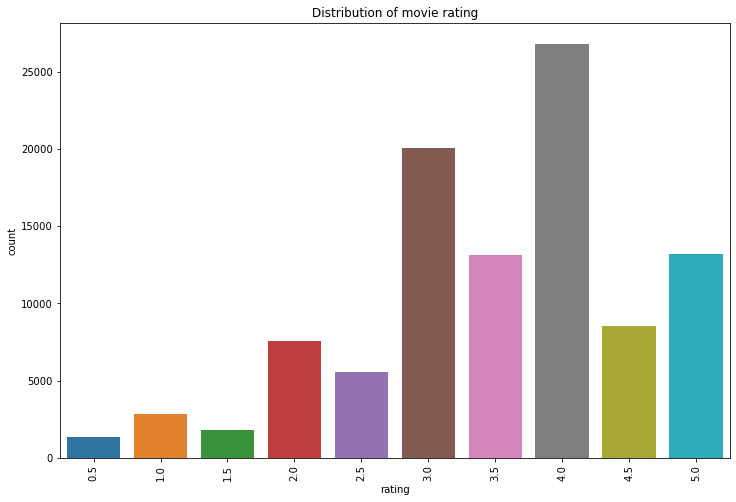

In [6]:
create_plots(movie_rating_df, 'count_plot', 'rating')

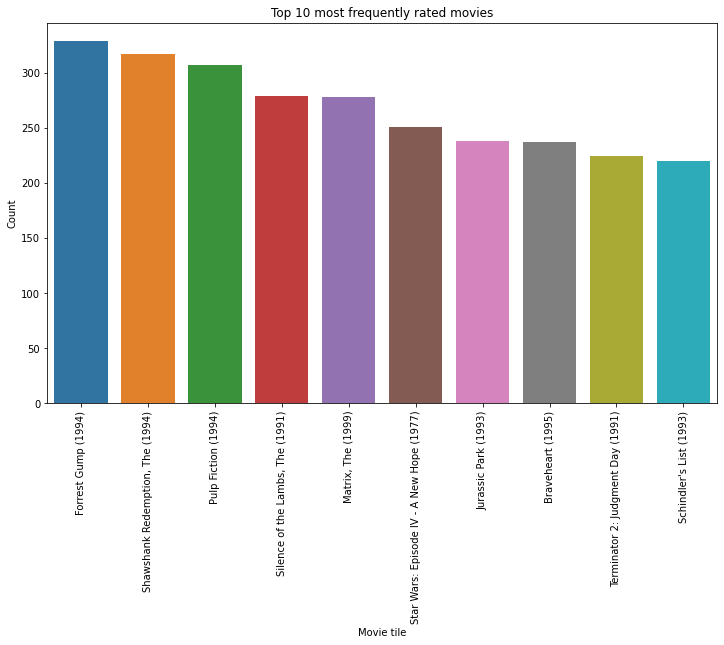

In [7]:
top_10_views = movie_rating_df['title'].value_counts().head(10)

create_plots(movie_rating_df, 'bar_plot1', top_10_views)

In [8]:
# Splitting the genres
def splitting_string(movies):
    movies['genres'] = movies['genres'].apply(lambda x: x.split('|'))
    from collections import Counter
    genre_frequency = Counter(g for genres in movies['genres'] for g in genres)
    
    return genre_frequency

splitting_string(movie_rating_df)

Counter({'Adventure': 24161,
         'Animation': 6988,
         'Children': 9208,
         'Comedy': 39053,
         'Fantasy': 11834,
         'Romance': 18124,
         'Drama': 41928,
         'Action': 30635,
         'Crime': 16681,
         'Thriller': 26452,
         'Horror': 7291,
         'Mystery': 7674,
         'Sci-Fi': 17243,
         'War': 4859,
         'Musical': 4138,
         'Documentary': 1219,
         'IMAX': 4145,
         'Western': 1930,
         'Film-Noir': 870,
         '(no genres listed)': 47})

In [9]:
exploded_genres_df = movie_rating_df.copy()
exploded_genres_df = exploded_genres_df.explode('genres')
exploded_genres_df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure,1,4.0,964982703
0,1,Toy Story (1995),Animation,1,4.0,964982703
0,1,Toy Story (1995),Children,1,4.0,964982703
0,1,Toy Story (1995),Comedy,1,4.0,964982703
0,1,Toy Story (1995),Fantasy,1,4.0,964982703
...,...,...,...,...,...,...
100832,193583,No Game No Life: Zero (2017),Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action,184,3.5,1537110021
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Animation,184,3.5,1537110021


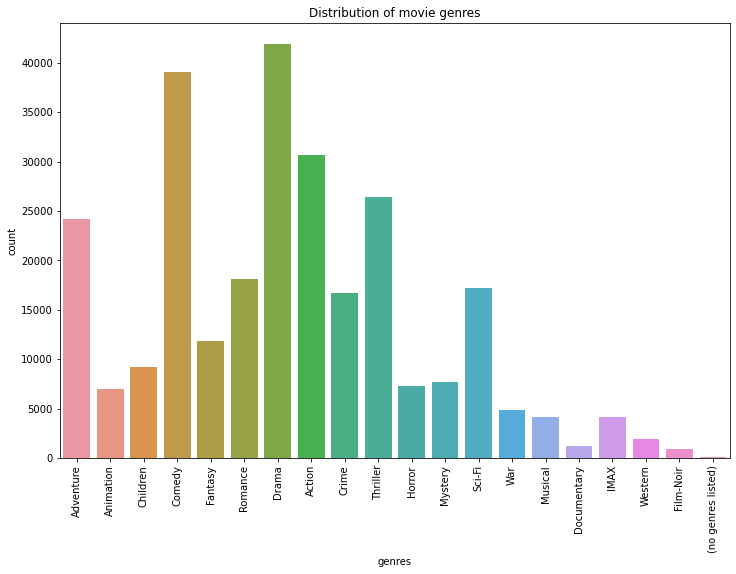

In [10]:

create_plots(exploded_genres_df, 'count_plot', 'genres')

### 2. BIVARIATE DATA ANALYSIS

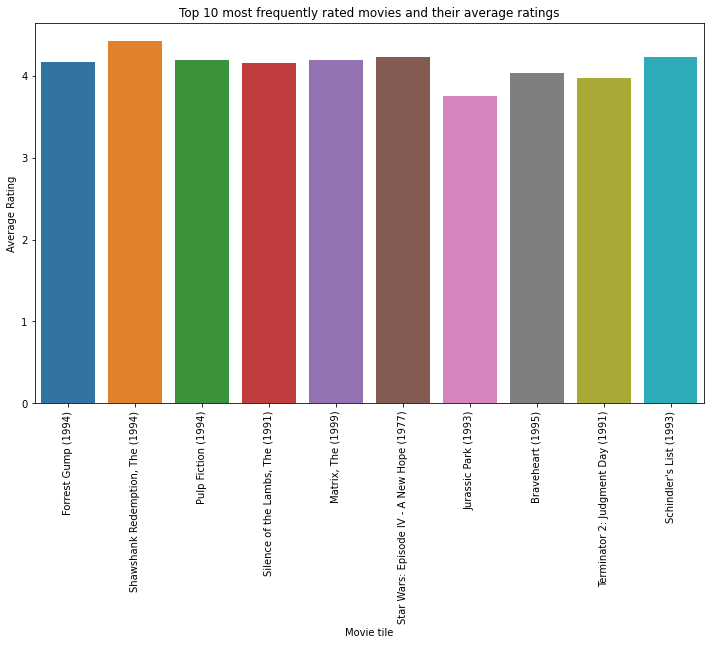

In [11]:
top_10_views = movie_rating_df['title'].value_counts().nlargest(10)
average_ratings = movie_rating_df.groupby('title')['rating'].mean().loc[top_10_views.index]


create_plots(movie_rating_df, 'bar_plot2', average_ratings)

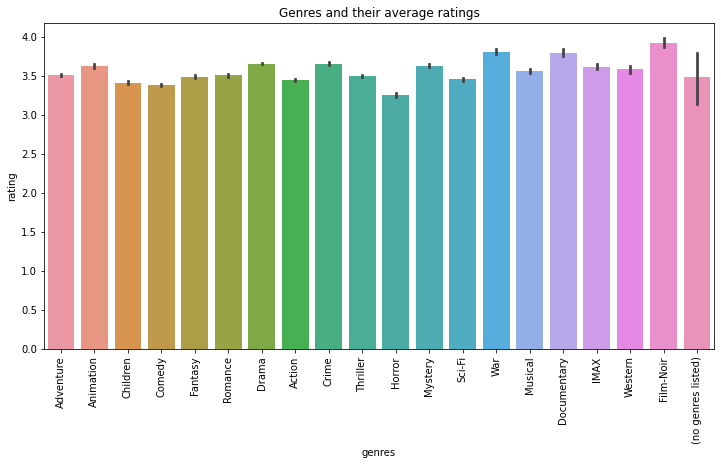

In [12]:
def bar_plot(x, y, data):
    
    plt.figure(figsize=(12,6))
    
    sns.barplot(x=x, y=y, data=data)
    plt.title('Genres and their average ratings')
    plt.xlabel(f'{x}')
    plt.xticks(rotation=90)
    plt.ylabel(f'{y}')
    plt.show()

bar_plot('genres', 'rating', exploded_genres_df)

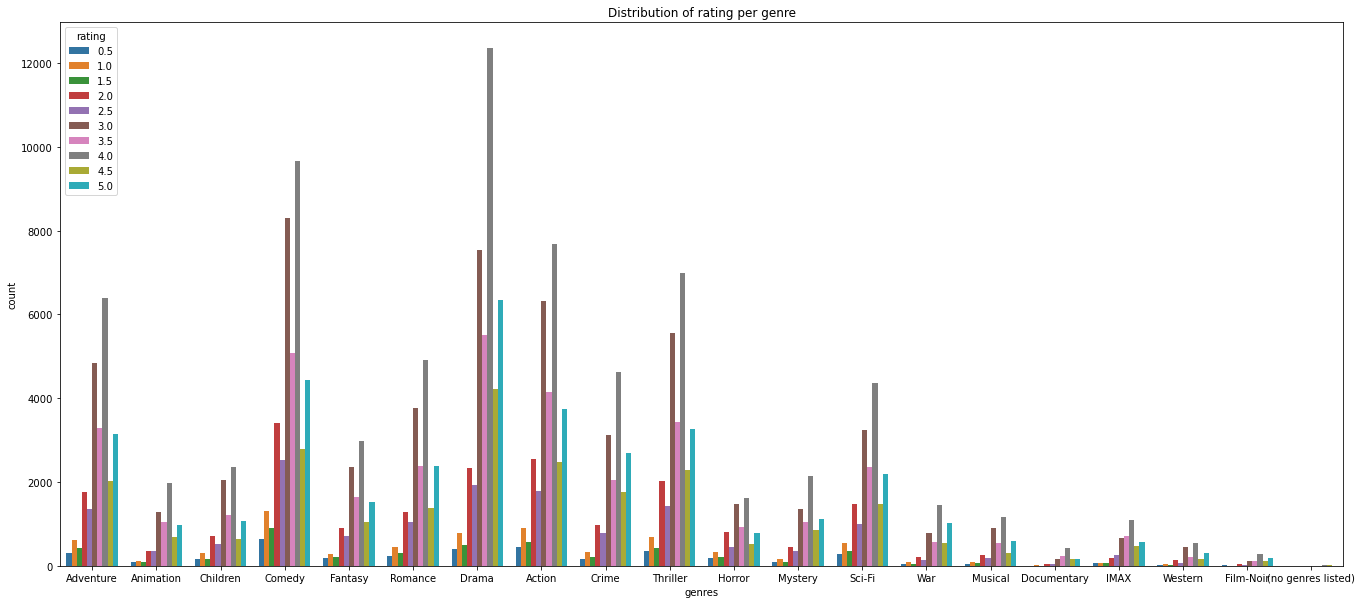

In [13]:
plt.figure(figsize=(23,10))
sns.countplot(data=exploded_genres_df, x='genres', hue='rating')
plt.title(f'Distribution of rating per genre')
plt.show()

## DATA PREPROCESSING

In [14]:
movie_rating_df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1,4.0,964982703
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",5,4.0,847434962
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",7,4.5,1106635946
3,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",15,2.5,1510577970
4,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]",184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]",184,3.5,1537109545
100833,193585,Flint (2017),[Drama],184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]",184,3.5,1537110021


## MODELLING

In [15]:
user_item_df = movie_rating_df[['userId', 'movieId', 'rating']]
user_item_df

,userId,movieId,rating
0,1,1,4.0
1,5,1,4.0
2,7,1,4.5
3,15,1,2.5
4,17,1,4.5
...,...,...,...
100831,184,193581,4.0
100832,184,193583,3.5
100833,184,193585,3.5
100834,184,193587,3.5


In [16]:

reader = Reader()
data = Dataset.load_from_df(user_item_df, reader)

In [17]:
# Split into train and test set
trainset, testset = train_test_split(data, test_size=0.2, random_state=111)


print("Number of users: ", trainset.n_users, "\n")
print("Number of items: ", trainset.n_items, "\n")

Number of users:  610 

Number of items:  8995 



In [ ]:
# Perform a gridsearch with SVD
params = {'n_factors': [20, 50, 100],
         'reg_all': [0.02, 0.05, 0.1],
         'n_epochs': [5,10],
         'lr_all': [0.002,0.005]}

g_s_svd = GridSearchCV(SVD,param_grid=params,n_jobs=-1)
g_s_svd.fit(trainset)

In [ ]:
# print out optimal parameters for SVD after GridSearch
# print(g_s_svd.best_score)
# print(g_s_svd.best_params)

{'rmse': 0.8688022994656125, 'mae': 0.6679865304773676}
{'rmse': {'n_factors': 50, 'reg_all': 0.05}, 'mae': {'n_factors': 20, 'reg_all': 0.02}}


In [28]:
# cross validating with KNNBasic
knn_basic = KNNBasic(sim_options={'name':'pearson', 'user_based':True})
knn_basic.fit(trainset)
predictions = knn_basic.test(testset)
print(accuracy.rmse(predictions))
# cv_knn_basic = cross_validate(knn_basic, data, n_jobs=-1)

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9721
0.9720846164183417


In [30]:
# cross validating with KNNBaseline
knn_baseline = KNNBaseline(sim_options={'name':'pearson', 'user_based':True})
knn_baseline.fit(trainset)
predictions = knn_baseline.test(testset)
print(accuracy.rmse(predictions))

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8790
0.8789611074934803


In [31]:
sim_pearson = {"name": "pearson", "user_based": True}
knn_means = KNNWithMeans(sim_options=sim_pearson)
knn_means.fit(trainset)
predictions = knn_means.test(testset)
print(accuracy.rmse(predictions))

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8995
0.8994971701396823


In [ ]:
sim_options = {'name': 'cosine', 'user_based': False}  # Centered cosine similarity
knn_model = KNNWithMeans(sim_options=sim_options)

# Train the model on the training set
knn_model.fit(trainset)

# Make predictions on the test set
predictions = knn_model.test(testset)

# Evaluate the model
accuracy.rmse(predictions)

# Example: Predict the rating for a specific user and item
user_id = '196'
item_id = '302'
predicted_rating = knn_model.predict(user_id, item_id).est
print(f'Predicted Rating for
print(f'Predicted Rating for user {user_id} and item {item_id}: {predicted_rating}')